# 6. Use Case with Application of SiReNetA to Weighted Networks

Authors: **Gorka Zamora-López** and **Matthieu Gilson**

---------------------

This notebook is part of an introductory tutorial for the use of *Stimulus-Response Network Analysis* ([SiReNetA](https://github.com/mb-BCA/SiReNetA)) to study the structure of complex networks, see [https://github.com/mb-BCA/SiReNetA_Tutorials](https://github.com/mb-BCA/SiReNetA_Tutorials).

---------------------

### Outline
* Example of use of SiReNetA with weighted network, comparison with binary networks

---------------------

## Import libraries

In [52]:
# Python standard and third-aprty library imports
import numpy as np
import sireneta as sna
import galib as ga
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

# Load the plotting options from a local file
from plot_specs import *

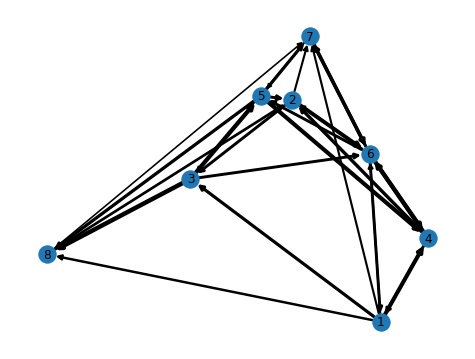

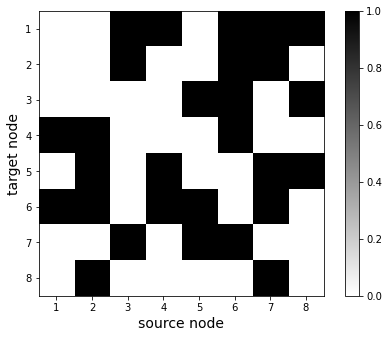

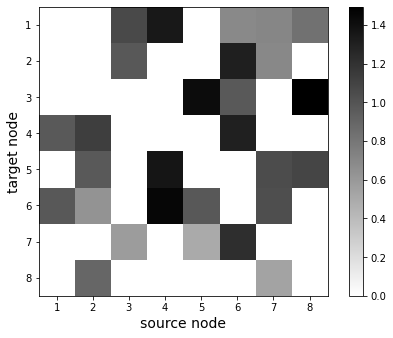

In [66]:
 # create a random directed binary graph with N nodes and L edges corresponding to 50% density
N = 8
L = int(N*(N-1) * 0.5)
G = nx.gnm_random_graph(N, L, directed=True)
# set random weights
for e in G.edges:
    nx.set_edge_attributes(G, {e: {'weight':np.random.rand()+0.5}})

# adjacency and weight matrix
A = nx.adjacency_matrix(G, weight=None).todense()
W = nx.adjacency_matrix(G).todense()

# adjacency and list of weights for all existing edges
w_list = np.fromiter(nx.get_edge_attributes(G, 'weight').values(), dtype=float)

# plot weighted graph using networkx library, the edge weight determines the arrow width
plt.figure()
pos = nx.spectral_layout(G)
node_labels = dict(zip(np.arange(N), np.arange(N)+1))
nx.draw(G, pos=pos, width=w_list*3.0)
nx.draw_networkx_labels(G, pos=pos, labels=node_labels)

# plot adjacency and weight matrices
plt.figure()
plt.imshow(A, cmap='gray_r')
plt.colorbar()
plt.xlabel('source node')
plt.ylabel('target node')
plt.xticks(np.arange(N), np.arange(N)+1)
plt.yticks(np.arange(N), np.arange(N)+1)
plt.tight_layout()

plt.figure()
plt.imshow(W, cmap='gray_r')
plt.colorbar()
plt.xlabel('source node')
plt.ylabel('target node')
plt.xticks(np.arange(N), np.arange(N)+1)
plt.yticks(np.arange(N), np.arange(N)+1)
plt.tight_layout()

Note that the weights can change the importance of nodes, aqs illustrated here for eigenvector centrality.

REPLACE nx BY ga?

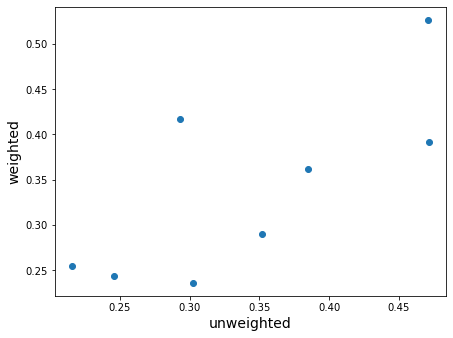

In [67]:
cent_unweighted = nx.centrality.eigenvector_centrality(G, weight=None)
cent_weighted = nx.centrality.eigenvector_centrality(G, weight='weight')

plt.figure()
plt.scatter(cent_unweighted.values(), cent_weighted.values(), label=np.arange(N)+1)
plt.xlabel('unweighted')
plt.ylabel('weighted')
plt.tight_layout()

In [68]:
rs_unweighted = sna.Resp_LeakyCascade(A, tau=0.1, timestep=0.01, tmax=1.5)
rs_weighted = sna.Resp_LeakyCascade(W, tau=0.1, timestep=0.01, tmax=1.5)

inrs_unweighted = sna.NodeResponses(rs_unweighted)[0]
inrs_weighted = sna.NodeResponses(rs_weighted)[0]

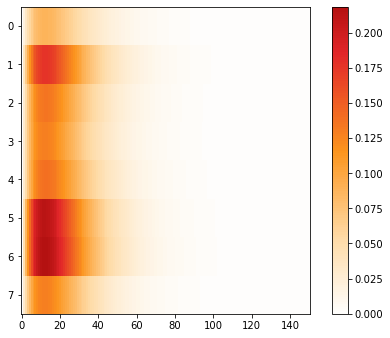

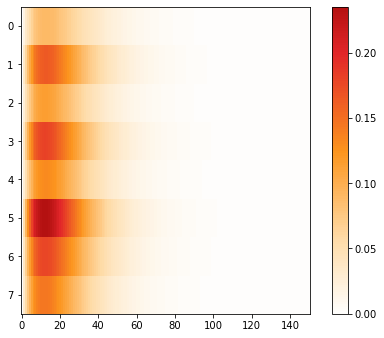

In [69]:
# plot the node responses as temporal raster (or carpet) plots

plt.figure()
plt.imshow(inrs_unweighted.T, aspect=20, interpolation='nearest', cmap=new_Reds)
plt.colorbar()
plt.tight_layout()

plt.figure()
plt.imshow(inrs_weighted.T, aspect=20, interpolation='nearest', cmap=new_Reds)
plt.colorbar()
plt.tight_layout()